In [23]:
# Import TF and TF Hub libraries.
import tensorflow as tf

# Load the input image.
image_path = 'pictures/woman.jpg'
image = tf.io.read_file(image_path)
image = tf.compat.v1.image.decode_jpeg(image)
image = tf.expand_dims(image, axis=0)
# Resize and pad the image to keep the aspect ratio and fit the expected size.
image = tf.image.resize_with_pad(image, 256, 256)

# Initialize the TFLite interpreter
model_path = '4.tflite'
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# TF Lite format expects tensor type of float32.
input_image = tf.cast(image, dtype=tf.uint8)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

interpreter.set_tensor(input_details[0]['index'], input_image.numpy())

interpreter.invoke()

# Output is a [1, 1, 17, 3] numpy array.
keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])

print(keypoints_with_scores)
print("next")
print(keypoints_with_scores[0][0][1])


[[[[0.34031335 0.47996855 0.5279131 ]
   [0.32889065 0.47795987 0.33265728]
   [0.33099872 0.47327444 0.57497185]
   [0.32289514 0.4562522  0.18343739]
   [0.32774675 0.45059624 0.48129508]
   [0.37624153 0.441877   0.5199145 ]
   [0.37277964 0.41382152 0.43523556]
   [0.44873586 0.46479112 0.33080414]
   [0.45751685 0.4433937  0.34639287]
   [0.4228289  0.5104434  0.36562175]
   [0.42247114 0.5065552  0.3767482 ]
   [0.5254343  0.45399272 0.45334822]
   [0.5307892  0.4194536  0.36942482]
   [0.6325317  0.47997108 0.5104467 ]
   [0.63983077 0.42191407 0.49918345]
   [0.74967134 0.46411726 0.26365826]
   [0.7603944  0.39997593 0.4710726 ]]]]
next
[0.32889065 0.47795987 0.33265728]


In [5]:
import numpy as np
import cv2
from segment_anything import SamPredictor, sam_model_registry
from skimage import io
from matplotlib import pyplot as plt

import torch

from skimage import filters
from skimage.data import camera
from skimage.util import compare_images

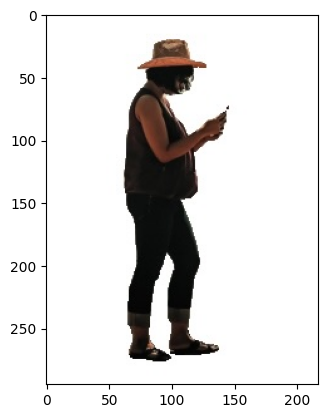

In [45]:
img = img = io.imread('result copy.jpeg')
plt.imshow(img)
plt.show()

In [7]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))  

Berechnenen der Position auf dem Bild:

In [ ]:
points = keypoints_with_scores[0][0]

point_array = np.array([[]])
input_array = np.array([])
print(point_array)
count = 0
for point in points:
    #point = tf.cast(point, dtype=tf.float32)
    print(np.array([point[0], point[1]]))
    point_array[count]= np.append(point_array[count], np.array([point[0], point[1]]))
    #point_array = np.concatenate((point_array, np.array([[point[0], point[1]]])), axis=0)
    input_array = np.append(input_array, 1)
    count = count + 1

print(input_array)
#input_point = np.array([[600, 400], [525, 600], [425, 600]])
#input_label = np.array([1, 1, 0])

print(point_array)

Punkte anzeigen

In [44]:
import sys
sys.path.append("..")

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)
predictor.set_image(img)

plt.figure(figsize=(10,10))
plt.imshow(img)
show_points(point_array, input_array, plt.gca())
plt.axis('on')
plt.show()


[]
[0.34031335 0.47996855]


ValueError: could not broadcast input array from shape (2,) into shape (0,)